<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Statistics-and-EDA-in-R/blob/main/Email_DataCamps_case_study_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("openintro")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘airports’, ‘cherryblossom’, ‘usdata’




In [ ]:
# Load packages
library(openintro)
library(ggplot2)
library(dplyr)

Loading required package: airports

Loading required package: cherryblossom

Loading required package: usdata


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
# Store email dataset into environment
email <- email

str(email)

tibble [3,921 × 21] (S3: tbl_df/tbl/data.frame)
 $ spam        : num [1:3921] 0 0 0 0 0 0 0 0 0 0 ...
 $ to_multiple : num [1:3921] 0 0 0 0 0 0 1 1 0 0 ...
 $ from        : num [1:3921] 1 1 1 1 1 1 1 1 1 1 ...
 $ cc          : int [1:3921] 0 0 0 0 0 0 0 1 0 0 ...
 $ sent_email  : num [1:3921] 0 0 0 0 0 0 1 1 0 0 ...
 $ time        : POSIXct[1:3921], format: "2012-01-01 06:16:41" "2012-01-01 07:03:59" ...
 $ image       : num [1:3921] 0 0 0 0 0 0 0 1 0 0 ...
 $ attach      : num [1:3921] 0 0 0 0 0 0 0 1 0 0 ...
 $ dollar      : num [1:3921] 0 0 4 0 0 0 0 0 0 0 ...
 $ winner      : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ inherit     : num [1:3921] 0 0 1 0 0 0 0 0 0 0 ...
 $ viagra      : num [1:3921] 0 0 0 0 0 0 0 0 0 0 ...
 $ password    : num [1:3921] 0 0 0 0 2 2 0 0 0 0 ...
 $ num_char    : num [1:3921] 11.37 10.5 7.77 13.26 1.23 ...
 $ line_breaks : int [1:3921] 202 202 192 255 29 25 193 237 69 68 ...
 $ format      : num [1:3921] 1 1 1 1 0 0 1 1 0 1 ...
 $ re_subj 

# Exercise 1: Is there an association between spam and the length of an email?


It's imperative to compute summary statistics separating into spam / not-spam

In [ ]:
# First of all it is necessary to change the data type of spam
#Convert that column to a factor and change it's name into 'No-Spam', 'Spam'

email$spam <- factor(ifelse(email$spam==0, 'Not-Spam', 'Spam' ))

In [ ]:
# Second, I compute summary statistics by group.

email %>%
  group_by(spam) %>%
  summarize(median(num_char),mean(num_char), sd(num_char))

,spam,median(num_char),mean(num_char),sd(num_char)
,<fct>,<dbl>,<dbl>,<dbl>
1,Not-Spam,6.831,11.250517,14.51076
2,Spam,1.046,5.439204,14.92010


We see mean is much higher than median, this means the distribution function is skewed towards the right.

It could be useful to plot a boxplot with log scale.

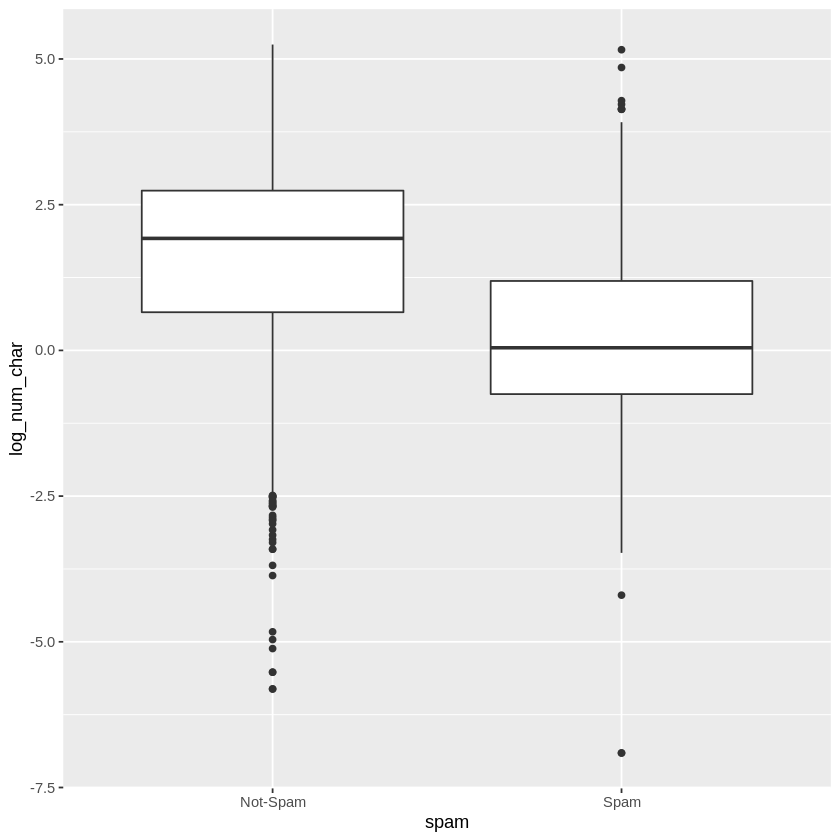

In [ ]:
# Create plot
email %>%
  mutate(log_num_char = log(num_char)) %>%
  ggplot(aes(x = spam, y = log_num_char)) +
  geom_boxplot()

Conclusion:
The median length of Not-spam is greater than the one for spam emails.
Even tough the medians are different, interquartile ranges overlaps from each other.
It seems Spam emails tend to be shorter.

# Exercise 2: What about exclamation marks?

Exlamation marks in dataset are stored in exclaim_mess feature.

In [ ]:
# compute summary statistics by group.

email %>%
  group_by(spam) %>%
  summarize(median(exclaim_mess), mean(exclaim_mess), sd(exclaim_mess))

,spam,median(exclaim_mess),mean(exclaim_mess),sd(exclaim_mess)
,<fct>,<dbl>,<dbl>,<dbl>
1,Not-Spam,1,6.508160,47.60968
2,Spam,0,7.321526,79.87275


## Density plots with fill spam

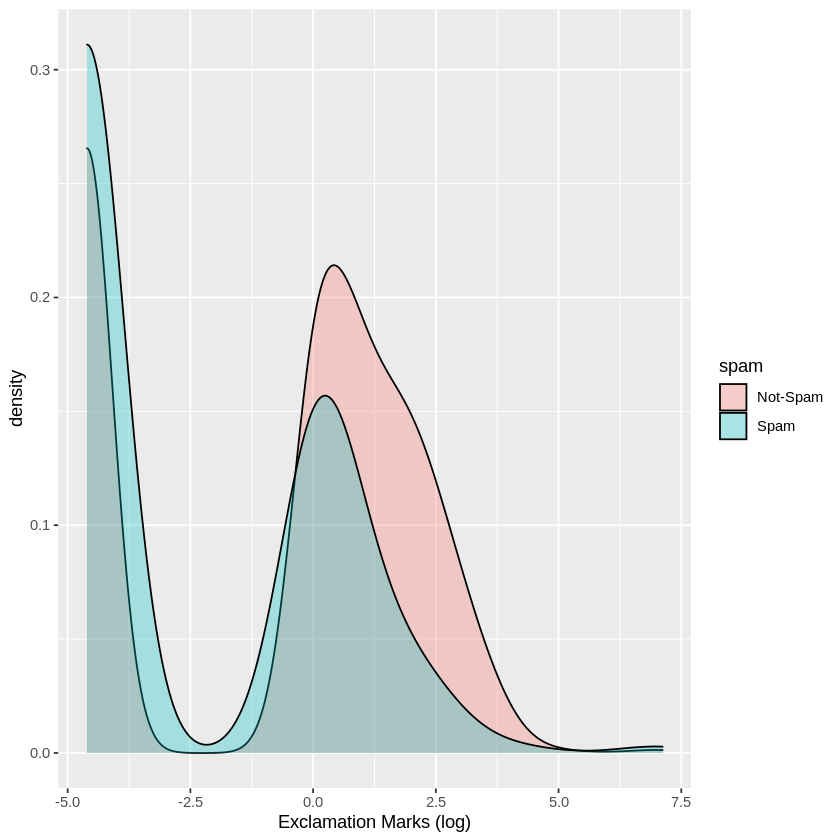

In [ ]:
email %>%
  mutate(log_exclaim_mess = log(exclaim_mess + .01)) %>%
  ggplot(aes(x = log_exclaim_mess, fill = spam)) +
  geom_density(alpha = 0.3) + 
  labs(x = "Exclamation Marks (log)")

Density plot shows a bimodal distribution. Summary statistics like mean are not as representative.

It seems Not-Spam has more exclamation points. But it would be clearer to see percentages with a full stacked bar.

We can ask: What percentage for each group has no exclamation points.

## Full stacked bar mails with zero exclamation points.

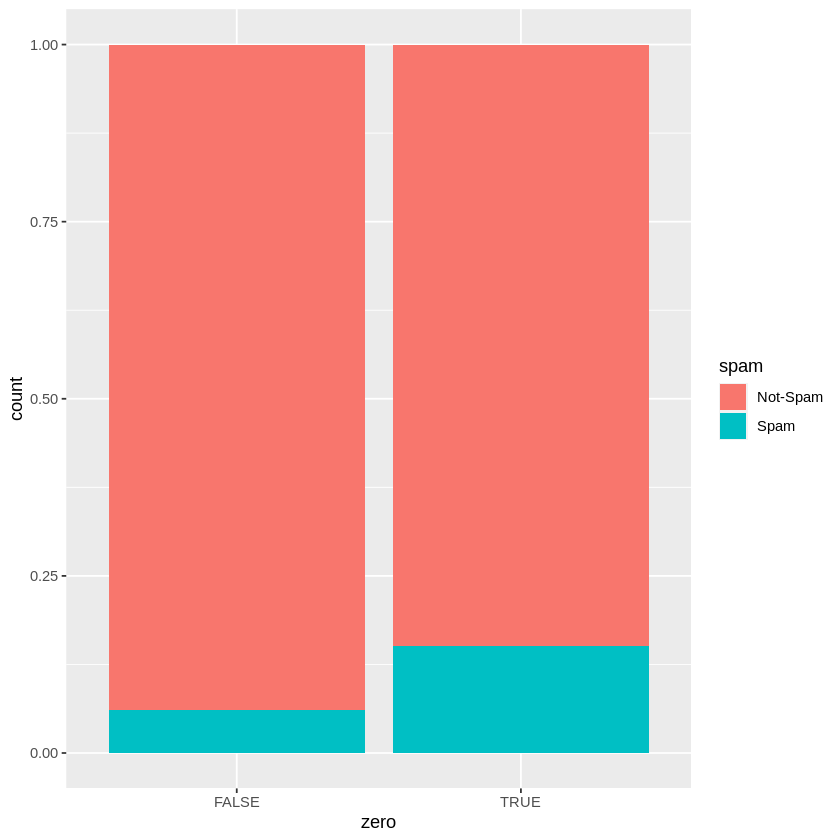

In [ ]:
email %>%
  mutate(zero = exclaim_mess==0) %>%
  ggplot(aes(x = zero, fill = spam)) +
  geom_bar(position='fill')

# Exercise 3: Classification and images attached.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



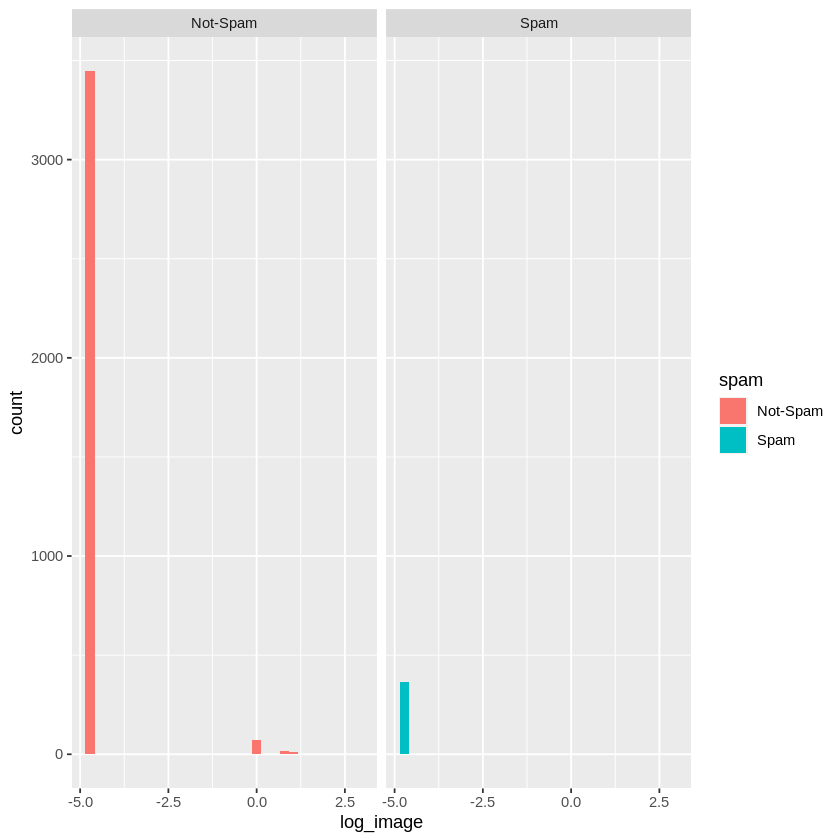

In [ ]:
# First we plot density function
email %>%
  mutate(log_image = log(image + .01)) %>%
  ggplot(aes(x = log_image, fill = spam)) +
  geom_histogram() + 
  facet_grid(~ spam)

Seems all Spam emails are almost always without images attached.

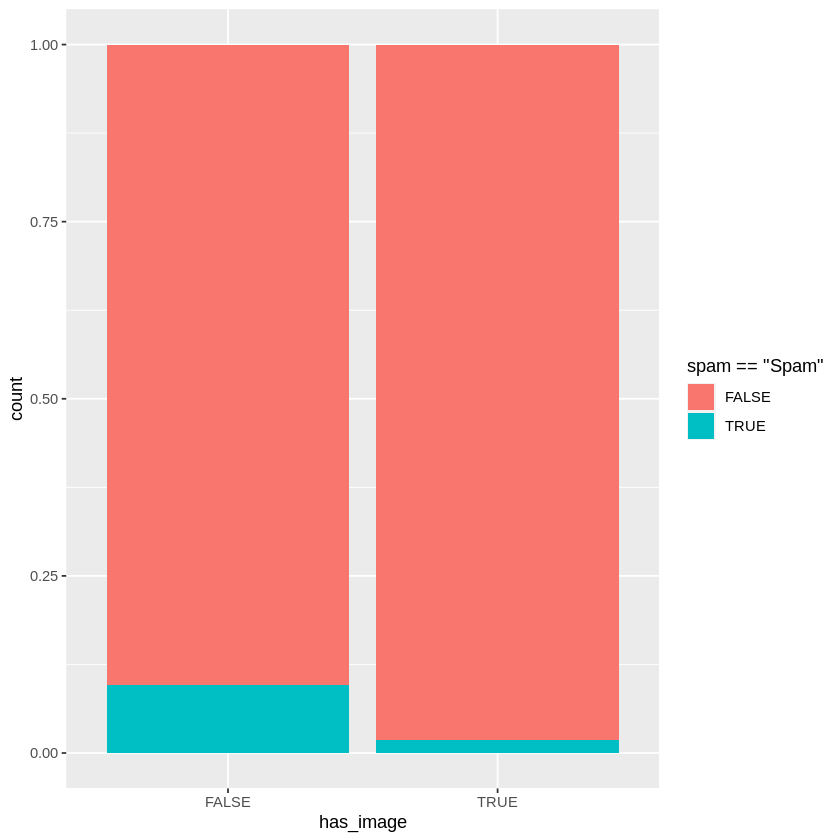

In [ ]:
# Create plot of proportion of spam by image
email %>%
  mutate(has_image = image>0) %>% 
  ggplot(aes(x = has_image, fill = spam)) +
  geom_bar(position = 'fill')

Spam emails are likely to have no images attached.

# Exercise 4: For emails containing the word "dollar", does the typical spam email contain a greater number of occurrences of the word than the typical non-spam email?

Create a summary statistic that answers this question.



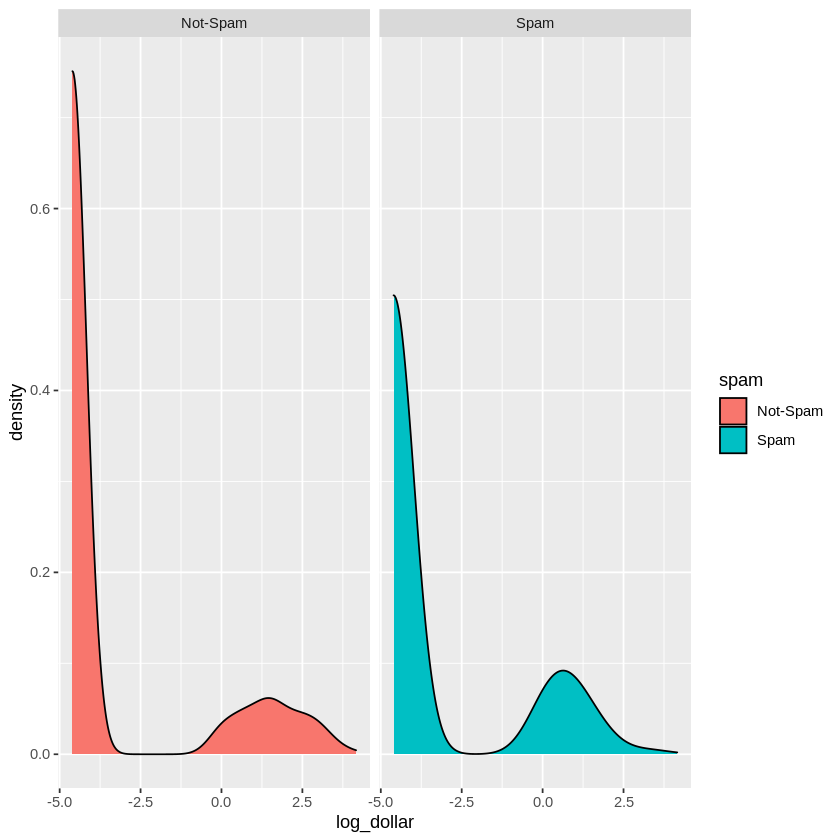

In [ ]:
# In dataset we have variable 'dollar'. 
# I first plot a density graph about the feature.

email %>%
  mutate(log_dollar = log(dollar + .01)) %>%  
  ggplot(aes(x = log_dollar, fill = spam)) +
  geom_density() + 
  facet_grid(~ spam)


In [ ]:
# Let's filter the dataset for all observations that contains dollar before summarizing.

email %>%
  filter(dollar>0) %>%
  group_by(spam) %>%
  summarize(mean(dollar), median(dollar), sd(dollar))

,spam,mean(dollar),median(dollar),sd(dollar)
,<fct>,<dbl>,<dbl>,<dbl>
1,Not-Spam,8.211078,4,9.426528
2,Spam,3.435897,2,5.208858


# Exercise 5: If you encounter an email with greater than 10 occurrences of the word "dollar", is it more likely to be spam or not-spam?

Create a barchart that answers this question.

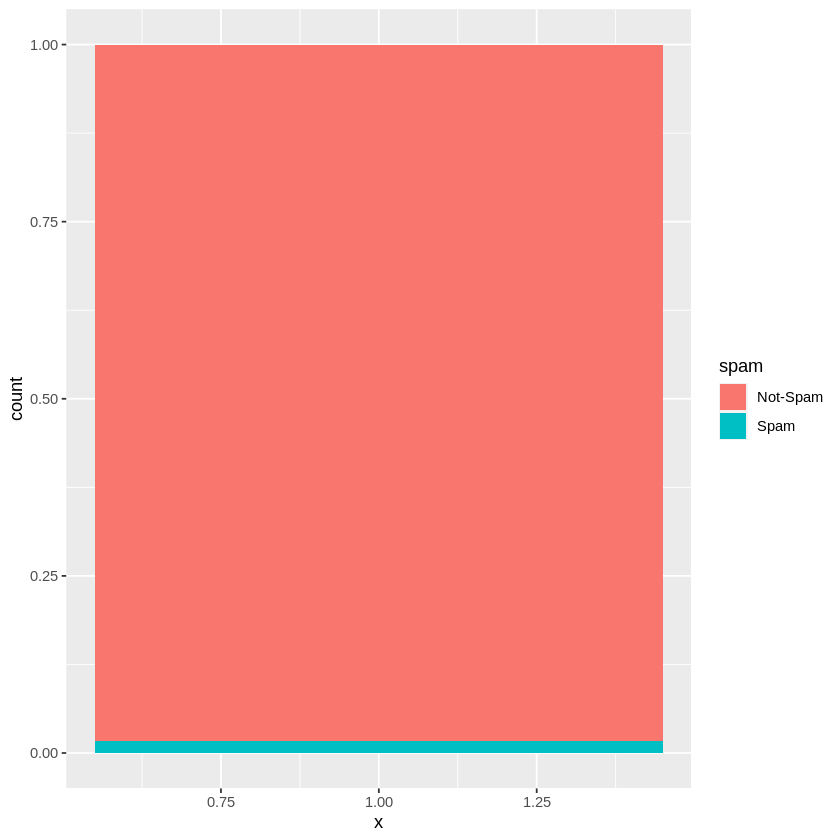

In [ ]:
email %>%
  filter(dollar>10) %>%
  ggplot(aes(x = 1, fill=spam)) +
  geom_bar(position= 'fill')

It is more likely to be Not-spam if an emails contains more than 10 words about dollars. The thing is Spam is a class with low frequency.

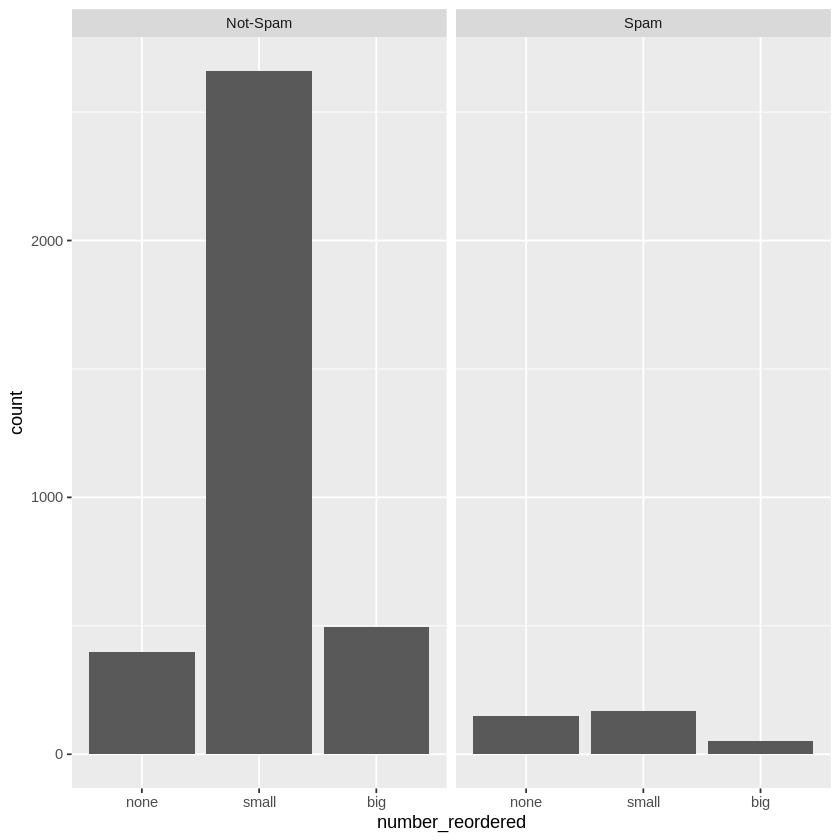

In [ ]:
# Reorder levels
email$number_reordered <- factor(email$number, levels = c("none", "small", "big"))

# Construct plot of number_reordered
ggplot(email, aes(x = number_reordered)) +
  geom_bar() +
  facet_wrap(~ spam)